# 케라스

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Dense, Activation, add, Flatten, GlobalAveragePooling2D, ZeroPadding2D
from keras.models import Model
import numpy as np

Using TensorFlow backend.


In [ ]:
def Residual_Block_conv2_1(x, n_ch):
    
    pre_layer = x
    x = Conv2D(filters = n_ch, kernel_size = (1,1), strides = (1,1), padding = 'valid')(x) # 64
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = n_ch, kernel_size = (3,3), strides = (1,1), padding = 'same')(x) # 64
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = 4*n_ch, kernel_size = (1,1), strides = (1,1), padding = 'valid')(x) # 256
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # add 연산을 위해서 1x1 컨볼루션을 통해 pre_layer의 사이즈를 x의 사이즈(4*n_ch)와 동일하게 맞춰준다.
    
    pre_layer = Conv2D(filters = 4*n_ch, kernel_size = (1,1), strides = (1,1), padding = 'valid')(pre_layer)
    pre_layer = BatchNormalization()(pre_layer)
    
    output = add([x, pre_layer])
    output = Activation('relu')(output)
    
    return output

def Residual_Block_conv2_x(x, n_ch):
    
    pre_layer = x
    x = Conv2D(filters = n_ch, kernel_size = (1,1), strides = (1,1), padding = 'valid')(x) # 64
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = n_ch, kernel_size = (3,3), strides = (1,1), padding = 'same')(x) # 64
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = 4*n_ch, kernel_size = (1,1), strides = (1,1), padding = 'valid')(x) # 256
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    #pre_layer = Conv2D(filters = 4*n_ch, kernel_size = (1,1), strides = (1,1), padding = 'valid')(pre_layer)
    
    # 1번 블록에서 이미 [filters = 4*n_ch, kernel_size = (1,1)]인 Conv2D를 통과시켜줘서 add할 pre_layer의 사이즈를 맞춰줬으므로 
    # 1번 블록 이후부터는 굳이 여길 통과시켜주지 않아도 된다. 통과시켜도 에러는 안나지만 파라미터 개수 늘어남.
    
    output = add([x, pre_layer])
    output = Activation('relu')(output)
    
    return output

def Residual_Block_conv3_1(x, n_ch):
    
    pre_layer = x
    x = Conv2D(filters = n_ch, kernel_size = (1,1), strides = (2,2), padding = 'valid')(x) # 128
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = n_ch, kernel_size = (3,3), strides = (1,1), padding = 'same')(x) # 128
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = 4*n_ch, kernel_size = (1,1), strides = (1,1), padding = 'valid')(x) # 512
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    pre_layer = Conv2D(filters = 4*n_ch, kernel_size = (1,1), strides = (2,2), padding = 'valid')(pre_layer)
    pre_layer = BatchNormalization()(pre_layer)
    
    output = add([x, pre_layer])
    output = Activation('relu')(output)
    
    return output

def Residual_Block_conv3_x(x, n_ch):
    
    pre_layer = x
    x = Conv2D(filters = n_ch, kernel_size = (1,1), strides = (1,1), padding = 'valid')(x) # 128
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = n_ch, kernel_size = (3,3), strides = (1,1), padding = 'same')(x) # 128
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = 4*n_ch, kernel_size = (1,1), strides = (1,1), padding = 'valid')(x) # 512
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    #pre_layer = Conv2D(filters = 4*n_ch, kernel_size = (1,1), strides = (1,1), padding = 'valid')(pre_layer)
    
    output = add([x, pre_layer])
    output = Activation('relu')(output)
    
    return output

def Residual_Block_conv4_1(x, n_ch): 
    
    pre_layer = x
    x = Conv2D(filters = n_ch, kernel_size = (1,1), strides = (2,2), padding = 'valid')(x) # 256
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = n_ch, kernel_size = (3,3), strides = (1,1), padding = 'same')(x) # 256
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = 4*n_ch, kernel_size = (1,1), strides = (1,1), padding = 'valid')(x) # 1024
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    pre_layer = Conv2D(filters = 4*n_ch, kernel_size = (1,1), strides = (2,2), padding = 'valid')(pre_layer)
    pre_layer = BatchNormalization()(pre_layer)
    
    output = add([x, pre_layer])
    output = Activation('relu')(output)
    
    return output

def Residual_Block_conv4_x(x, n_ch): 
    
    pre_layer = x
    x = Conv2D(filters = n_ch, kernel_size = (1,1), strides = (1,1), padding = 'valid')(x) # 256
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = n_ch, kernel_size = (3,3), strides = (1,1), padding = 'same')(x) # 256
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = 4*n_ch, kernel_size = (1,1), strides = (1,1), padding = 'valid')(x) # 1024
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    #pre_layer = Conv2D(filters = 4*n_ch, kernel_size = (1,1), strides = (1,1), padding = 'valid')(pre_layer)
    
    output = add([x, pre_layer])
    output = Activation('relu')(output)
    
    return output

def Residual_Block_conv5_1(x, n_ch): 
    
    pre_layer = x
    x = Conv2D(filters = n_ch, kernel_size = (1,1), strides = (2,2), padding = 'valid')(x) # 512
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = n_ch, kernel_size = (3,3), strides = (1,1), padding = 'same')(x) # 512
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = 4*n_ch, kernel_size = (1,1), strides = (1,1), padding = 'valid')(x) # 2048
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    pre_layer = Conv2D(filters = 4*n_ch, kernel_size = (1,1), strides = (2,2), padding = 'valid')(pre_layer)
    pre_layer = BatchNormalization()(pre_layer)
    
    output = add([x, pre_layer])
    output = Activation('relu')(output)
    
    return output

def Residual_Block_conv5_x(x, n_ch):
    
    pre_layer = x
    x = Conv2D(filters = n_ch, kernel_size = (1,1), strides = (1,1), padding = 'valid')(x) # 512
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = n_ch, kernel_size = (3,3), strides = (1,1), padding = 'same')(x) # 512
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters = 4*n_ch, kernel_size = (1,1), strides = (1,1), padding = 'valid')(x) # 2048
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    #pre_layer = Conv2D(filters = 4*n_ch, kernel_size = (1,1), strides = (1,1), padding = 'valid')(pre_layer)
    
    output = add([x, pre_layer])
    output = Activation('relu')(output)
    
    return output

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_26 (ZeroPadding2 (None, 230, 230, 3)  0           input_14[0][0]                   
__________________________________________________________________________________________________
conv2d_284 (Conv2D)             (None, 112, 112, 64) 9472        zero_padding2d_26[0][0]          
__________________________________________________________________________________________________
batch_normalization_235 (BatchN (None, 112, 112, 64) 256         conv2d_284[0][0]                 
____________________________________________________________________________________________

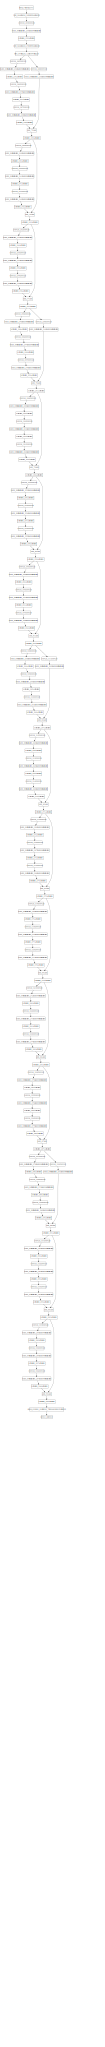

In [ ]:
# ResNet-50

inputs = Input(shape = (224,224,3))

x = ZeroPadding2D(padding=(3,3))(inputs)
x = Conv2D(filters = 64, kernel_size = (7,7), strides = (2,2), padding = 'valid')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = ZeroPadding2D(padding=(1,1))(x)
x = MaxPooling2D(pool_size = (3,3), strides = (2,2))(x)

x = Residual_Block_conv2_1(x, 64) # conv2_1
x = Residual_Block_conv2_x(x, 64) # conv2_2
x = Residual_Block_conv2_x(x, 64) # conv2_3

x = Residual_Block_conv3_1(x, 128) # conv3_1
x = Residual_Block_conv3_x(x, 128) # conv3_2
x = Residual_Block_conv3_x(x, 128) # conv3_3
x = Residual_Block_conv3_x(x, 128) # conv3_4

x = Residual_Block_conv4_1(x, 256) # conv4_1
x = Residual_Block_conv4_x(x, 256) # conv4_2
x = Residual_Block_conv4_x(x, 256) # conv4_3
x = Residual_Block_conv4_x(x, 256) # conv4_4
x = Residual_Block_conv4_x(x, 256) # conv4_5
x = Residual_Block_conv4_x(x, 256) # conv4_6

x = Residual_Block_conv5_1(x, 512) # conv5_1
x = Residual_Block_conv5_x(x, 512) # conv5_2
x = Residual_Block_conv5_x(x, 512) # conv5_3

x = GlobalAveragePooling2D()(x)

outputs = Dense(1000, activation = 'softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(model, dpi=50).create(prog='dot', format='svg'))

# 파이토치

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torch.optim as optim
import os
from torchsummary import summary

In [2]:
# Basic Block 정의 (ResNet-18, ResNet-34 용도)
# ResNet-18, ResNet-34에서, 하나의 Block은 두개의 컨볼루션 층으로 이루어짐

class Basicblock(nn.Module):
    expansion = 1
    
    def __init__(self, in_planes, planes, stride=1):
        super(Basicblock, self).__init__()
        
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        
        ''' identity mapping '''
        
        # stride가 1이여서 입력값과 출력값의 차원이 같은 경우
        self.shortcut = nn.Sequential()
        
        # stride가 1이 아니라면, 입력값과 출력값의 차원이 달라질 것이기에. 
        # 채널은 그대로 두고 별도로 stride를 통해 입력값(x)의 차원만 바꿔준다
        
        if stride != 1:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )
            
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out)) # 여기까지의 결과가 F(x)
        out += self.shortcut(x)         # 여기까지의 결과는 F(x)+x
        out = F.relu(out)
        return out
    
# Bottle Block 정의 (ResNet-50, ResNet-101, ResNet-150 용도)
# ResNet-50, ResNet-101, ResNet-150에서, 하나의 Block은 세개의 컨볼루션 층으로 이루어짐

class Bottleblock(nn.Module):
    expansion = 4
    
    def __init__(self, in_planes, planes, stride=1):
        super(Bottleblock, self).__init__()
        
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, stride=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        
        self.conv3 = nn.Conv2d(planes, self.expansion*planes, kernel_size=1, stride=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)
        
        self.shortcut = nn.Sequential()
        
        # 두번째 조건 이유는 논문 Fig.5에서, 입력값의 채널 수(in_planes)는 Table.1에 적혀있는 출력값 채널 수(planes)의 4배여야
        # 더해질 수 있다. 따라서 그 조건을 만족하지 못하면 별도로 채널 수만 그에 맞게 변화시켜 컨볼루션 통과시켜줘야한다.
        
        if stride != 1  or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )
            
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out)) # 여기까지의 결과가 F(x)
        out += self.shortcut(x)         # 여기까지의 결과는 F(x)+x
        out = F.relu(out)
        return out
    
# ResNet 클래스 정의

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64
        
        # 첫번째 레이어에서 원래 커널 사이즈는 7이지만, CIFAR-10을 위해 그냥 3에서 시작
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False) 
        self.bn1 = nn.BatchNorm2d(64)
        self.maxpool1 = nn.MaxPool2d(3,3)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)  # 이때의 stride들은 첫번째 Block의 stride
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2) # 이때의 채널 수(ex.128)는 in
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        
        # input 이미지의 사이즈에 따라 512라는 숫자는 에러난 것을 보고 바뀌줘야함
        self.linear = nn.Linear(512*block.expansion, num_classes)
    
    # Block의 stride를 정해주고 레이어를 연결해주는 함수
    # 첫번째 컨볼루션 연산에 대해서만 정해놓은 stride가 작용하도록 하고, 나머지 컨볼루션 층에서는 stride=1로만 작용하도록 함
    
    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride)) # 블록의 반복을 위한 코드 (ex. 3x3커널, 64채널 블록 2개)
            
            # '다음 블록'의 첫번째 레이어를 위해 input 채널 수 변경
            # ex) (in, out)이 (256,128),(128,128),(128,512) -> ("512",128),(128,128),(128,512) -> ... 이렇게 돼야 하기 때문
            # 바로 아래 셀의 코드 실행 결과를 참고
                    
            self.in_planes = planes*block.expansion   
            
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        #out = self.maxpool1(out) # CIFAR-10에 대해서는 MaxPooling을 하면 크기가 너무 작아져서 쓰지 않기로 함
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0),-1) # flastten 과정
        out = self.linear(out)
        return out
    
def ResNet18():
    return ResNet(Basicblock, [2,2,2,2])

def ResNet34():
    return ResNet(Basicblock, [3,4,6,3])

def ResNet50():
    return ResNet(Bottleblock, [3,4,6,3])

def ResNet101():
    return ResNet(Bottleblock, [3,4,23,3])

def ResNet150():
    return ResNet(Bottleblock, [3,8,36,3])

In [4]:
ResNet(Bottleblock, [3,4,6,3]) # ResNet-50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleblock(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momen

In [6]:
if __name__ == '__main__':
    model = ResNet50().cuda()
    summary(model, (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]           4,096
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
            Conv2d-7          [-1, 256, 32, 32]          16,384
       BatchNorm2d-8          [-1, 256, 32, 32]             512
            Conv2d-9          [-1, 256, 32, 32]          16,384
      BatchNorm2d-10          [-1, 256, 32, 32]             512
      Bottleblock-11          [-1, 256, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          16,384
      BatchNorm2d-13           [-1, 64, 32, 32]             128
           Conv2d-14           [-1, 64,

In [7]:
# 예시) 논문의 ResNet-34의 conv4_x의 경우 Block이 6개 
# 이때 첫번째 Block의 stride만 빼고 그 뒤의 Block들은 stride가 전부 1

stride = 2
num_blocks = 6
strides = [stride] + [1] * (num_blocks-1)
strides

[2, 1, 1, 1, 1, 1]

In [14]:
# 데이터셋 다운로드 및 불러오기

import torchvision
import torchvision.transforms as transforms

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

transform_test = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [20]:
# 환경 설정 및 학습 함수 정의

device = 'cuda'

net = ResNet18() # 훈련은 빨리 하기 위해 ResNet-18을 이용
net = net.to(device)
net = torch.nn.DataParallel(net)
cudnn.benchmark = True

learning_rate = 0.1
file_name = 'resnet18_cifar10.pt'

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=0.0002)

def train(epoch):
    print('\n[ Train epoch: %d ]' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    # 매번 배치 사이즈만큼 데이터를 뽑는다
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        
        benign_outputs = net(inputs)
        loss = criterion(benign_outputs, targets)
        loss.backward()
        
        optimizer.step()
        train_loss += loss.item()
        _, predicted = benign_outputs.max(1)
        
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        
        if batch_idx % 100 == 0:
            print('\nCurrent batch:', str(batch_idx))
            print('Current benign train accuracy:', str(predicted.eq(targets).sum().item()/targets.size(0)))
            print('Current benign train loss:', loss.item())

    print('\nTotal benign train accuarcy:', 100. * correct / total)
    print('Total benign train loss:', train_loss)
    
def test(epoch):
    print('\n[ Test epoch: %d ]' % epoch)
    net.eval()
    loss = 0
    correct = 0
    total = 0
    
    for batch_idx, (inputs, targets) in enumerate(test_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        total += targets.size(0)
        
        outputs = net(inputs)
        loss += criterion(outputs, targets).item()
        
        _, predicted = outputs.max(1)
        correct += predicted.eq(targets).sum().item()
        
    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', loss / total)
    
    state = {
        'net': net.state_dict()
    }
    if not os.path.isdir('checkpoint'):
        os.mkdir('checkpoint')
    torch.save(state, './checkpoint/' + file_name)
    print('Model Saved!')
    
# CIFAR-10의 경우 lr을 0.1부터 1/10씩 줄여나가는 방법 많이 사용
def adjust_learning_rate(optimizer, epoch):
    lr = learning_rate
    if epoch >= 100:
        lr /= 10
    if epoch >= 150:
        lr /= 10
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [21]:
# 학습 진행

for epoch in range(0,20):
    adjust_learning_rate(optimizer, epoch)
    train(epoch)
    test(epoch)


[ Train epoch: 0 ]


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))



Current batch: 0
Current benign train accuracy: 0.0859375
Current benign train loss: 2.339311122894287

Current batch: 100
Current benign train accuracy: 0.3671875
Current benign train loss: 1.9032750129699707

Current batch: 200
Current benign train accuracy: 0.375
Current benign train loss: 1.7540596723556519

Current batch: 300
Current benign train accuracy: 0.328125
Current benign train loss: 1.782798409461975

Total benign train accuarcy: 30.874
Total benign train loss: 754.1832928657532

[ Test epoch: 0 ]

Test accuarcy: 34.66
Test average loss: 0.01810149643421173
Model Saved!

[ Train epoch: 1 ]

Current batch: 0
Current benign train accuracy: 0.375
Current benign train loss: 1.596247911453247

Current batch: 100
Current benign train accuracy: 0.5703125
Current benign train loss: 1.2218120098114014

Current batch: 200
Current benign train accuracy: 0.5390625
Current benign train loss: 1.2800642251968384

Current batch: 300
Current benign train accuracy: 0.546875
Current benign